### Step 1: Reading and Understanding the Data

In [583]:
import warnings
warnings.filterwarnings('ignore')

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
### read the file
data= pd.read_csv(r'Leads.csv')

In [586]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [587]:
data.shape

(9240, 37)

In [588]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [590]:
### find the cloumns that has catogory 'Select'. Select is almost as same as blank when the user did not fill the column
data.apply(lambda column: column.astype(str).str.contains('Select').any())

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [591]:
### Replace select with NaN
data= data.replace('Select',np.nan)

In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Missing values treatment

In [593]:
### Finding missing values
data.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [594]:
### number of columns that has missing values
data.isnull().any().sum()

17

In [595]:
### Percentage of missing values across each column
print(round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,2))

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [596]:
### drop columns that has morethan 30% of missing values and other unwanted columns (Prospect ID & Lead Number)

data = data.drop(['How did you hear about X Education','Lead Profile','Lead Quality',
                  'Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index',
                  'Asymmetrique Activity Score','City','Specialization','Tags','Prospect ID', 'Lead Number'], axis=1)

In [597]:
data.shape

(9240, 25)

In [598]:
### missing values columns post dropping of variables
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Newspaper                                           0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Search                                              0
X Education Forums                                  0
Newspaper Article           

In [599]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [600]:
### Replace missing values with mode 'Better Career Prospects'
data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace= True)

In [601]:
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [602]:
### Replace missing values with mode 'Unemployed'
data['What is your current occupation'].fillna('Unemployed', inplace= True)

In [603]:
data.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [604]:
### drop the cloumn country as it looks unuseful (data skewed towards country India)
data.drop('Country', axis=1, inplace= True)

In [605]:
data.TotalVisits.value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [606]:
### Blank values shows people did not visit the website. Replace missing values with zero
data.TotalVisits.fillna(0,inplace=True)

In [607]:
data['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [608]:
### Blank values shows people did not visit the website. Replace missing values with zero
data['Page Views Per Visit'].fillna(0,inplace=True)

In [609]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [610]:
#### drop rows that is less than 2 % of missing values
data.dropna(inplace=True)

In [611]:
data.isnull().sum().sort_values(ascending=False)

Lead Origin                                      0
Lead Source                                      0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
Search                                           0
What matters most to you in choosing a course    0
What is your current occupation                  0
Last Activity                                    0
Page Views Per Visit                             0
Total Time Spent on Website                      0
TotalVisits                    

In [612]:
data.shape

(9103, 24)

### Step 2: Data Visualization

#### Exploratory Data Analysis

#### Univariate analysis

0    0.620784
1    0.379216
Name: Converted, dtype: float64


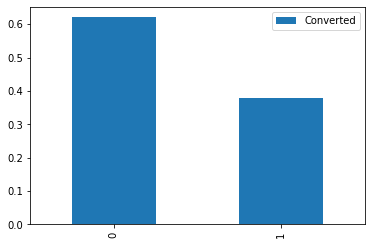

In [613]:
print(data['Converted'].value_counts(normalize=True))
data['Converted'].value_counts(normalize=True).plot.bar()
plt.legend()

###### 37.92% of leads converted and 62% of leads not converted

Landing Page Submission    0.54
API                        0.39
Lead Add Form              0.07
Lead Import                0.00
Name: Lead Origin, dtype: float64


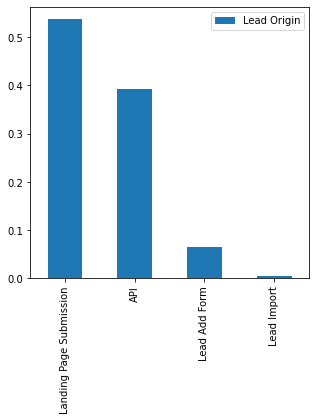

Google               0.32
Direct Traffic       0.28
Olark Chat           0.19
Organic Search       0.13
Reference            0.05
Welingak Website     0.01
Referral Sites       0.01
Facebook             0.00
bing                 0.00
google               0.00
Click2call           0.00
Press_Release        0.00
Social Media         0.00
Live Chat            0.00
youtubechannel       0.00
testone              0.00
Pay per Click Ads    0.00
welearnblog_Home     0.00
WeLearn              0.00
blog                 0.00
NC_EDM               0.00
Name: Lead Source, dtype: float64


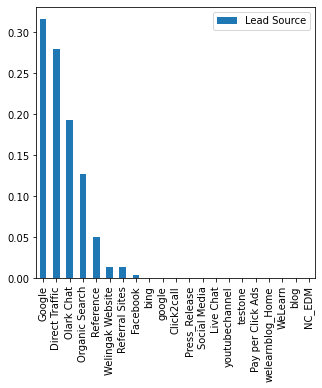

No     0.92
Yes    0.08
Name: Do Not Email, dtype: float64


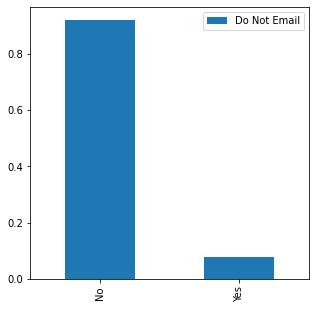

No     1.0
Yes    0.0
Name: Do Not Call, dtype: float64


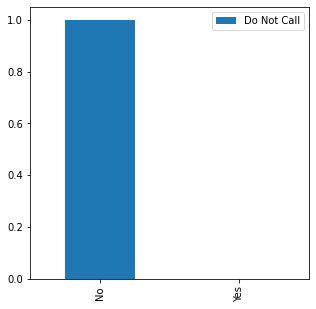

Email Opened                    0.38
SMS Sent                        0.30
Olark Chat Conversation         0.11
Page Visited on Website         0.07
Converted to Lead               0.05
Email Bounced                   0.04
Email Link Clicked              0.03
Form Submitted on Website       0.01
Unreachable                     0.01
Unsubscribed                    0.01
Had a Phone Conversation        0.00
Approached upfront              0.00
View in browser link Clicked    0.00
Email Received                  0.00
Email Marked Spam               0.00
Visited Booth in Tradeshow      0.00
Resubscribed to emails          0.00
Name: Last Activity, dtype: float64


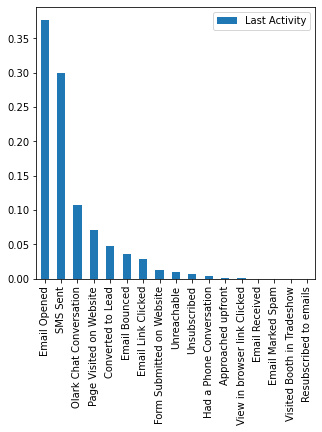

Unemployed              0.90
Working Professional    0.08
Student                 0.02
Other                   0.00
Housewife               0.00
Businessman             0.00
Name: What is your current occupation, dtype: float64


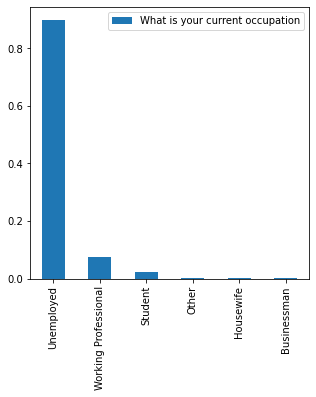

Better Career Prospects      1.0
Flexibility & Convenience    0.0
Other                        0.0
Name: What matters most to you in choosing a course, dtype: float64


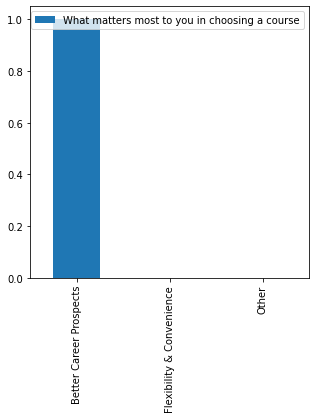

No     1.0
Yes    0.0
Name: Search, dtype: float64


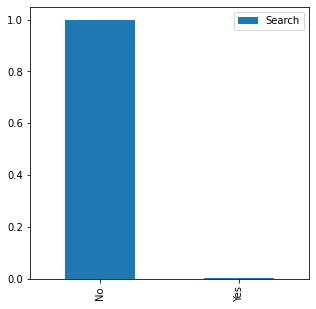

No    1.0
Name: Magazine, dtype: float64


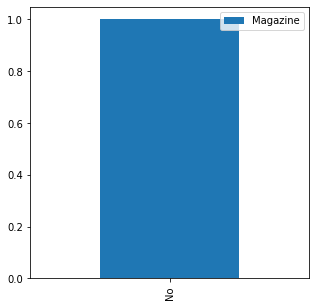

No     1.0
Yes    0.0
Name: Newspaper Article, dtype: float64


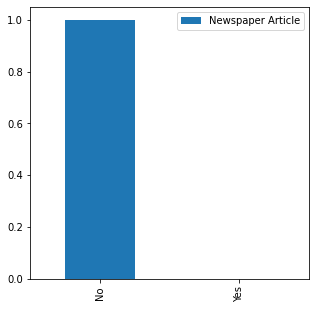

No     1.0
Yes    0.0
Name: X Education Forums, dtype: float64


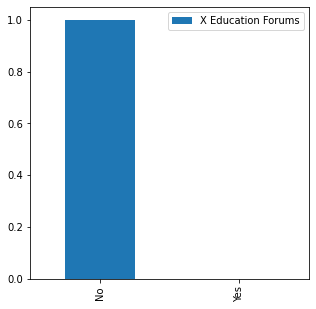

No     1.0
Yes    0.0
Name: Newspaper, dtype: float64


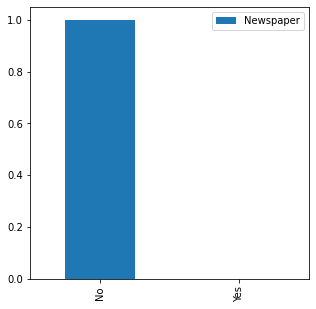

No     1.0
Yes    0.0
Name: Digital Advertisement, dtype: float64


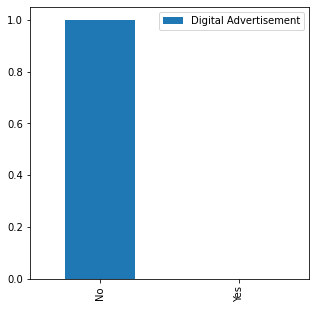

No     1.0
Yes    0.0
Name: Through Recommendations, dtype: float64


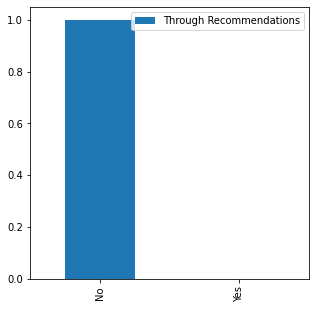

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64


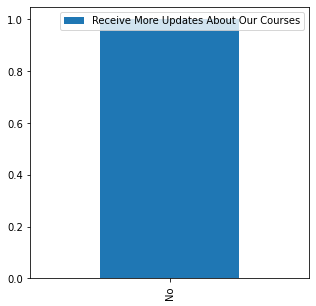

No    1.0
Name: Update me on Supply Chain Content, dtype: float64


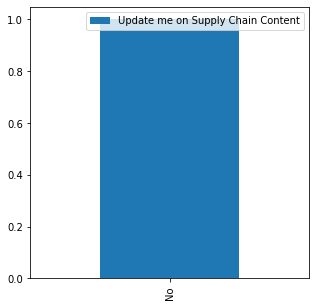

No    1.0
Name: Get updates on DM Content, dtype: float64


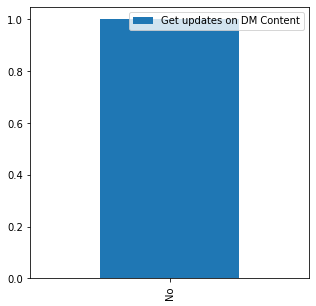

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64


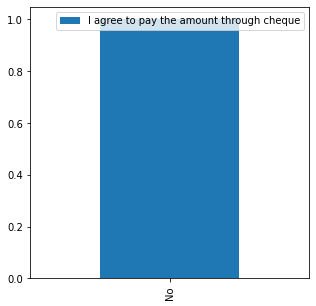

No     0.68
Yes    0.32
Name: A free copy of Mastering The Interview, dtype: float64


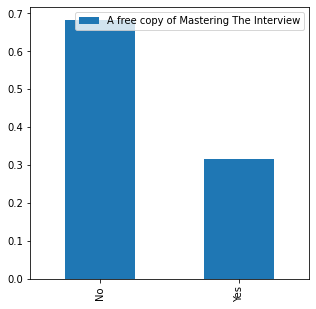

Modified                        0.36
Email Opened                    0.31
SMS Sent                        0.24
Page Visited on Website         0.03
Olark Chat Conversation         0.02
Email Link Clicked              0.02
Email Bounced                   0.01
Unsubscribed                    0.00
Unreachable                     0.00
Had a Phone Conversation        0.00
Email Marked Spam               0.00
Approached upfront              0.00
Resubscribed to emails          0.00
View in browser link Clicked    0.00
Form Submitted on Website       0.00
Email Received                  0.00
Name: Last Notable Activity, dtype: float64


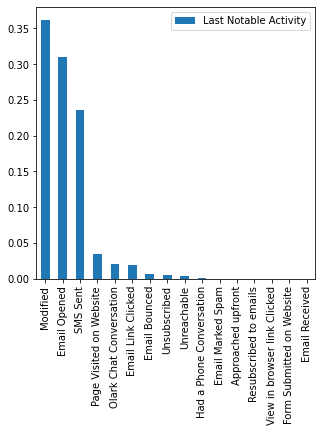

In [614]:
### Univariate analysis on categorical variables
for cols in data.columns:
    if data[cols].dtypes=='object':
        print(round(data[cols].value_counts(normalize=True, dropna= False),2))
        plt.figure(figsize=[5,5])
        data[cols].value_counts(normalize=True, dropna=False).plot.bar()
        plt.legend()
        plt.show()

#### Insights - Below columns are mostly skewed towards only one category
Do Not Call, What matters most to you in choosing a course, Search, Magazine, Newspaper Article,  X Education Forums
Newspaper,  Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque

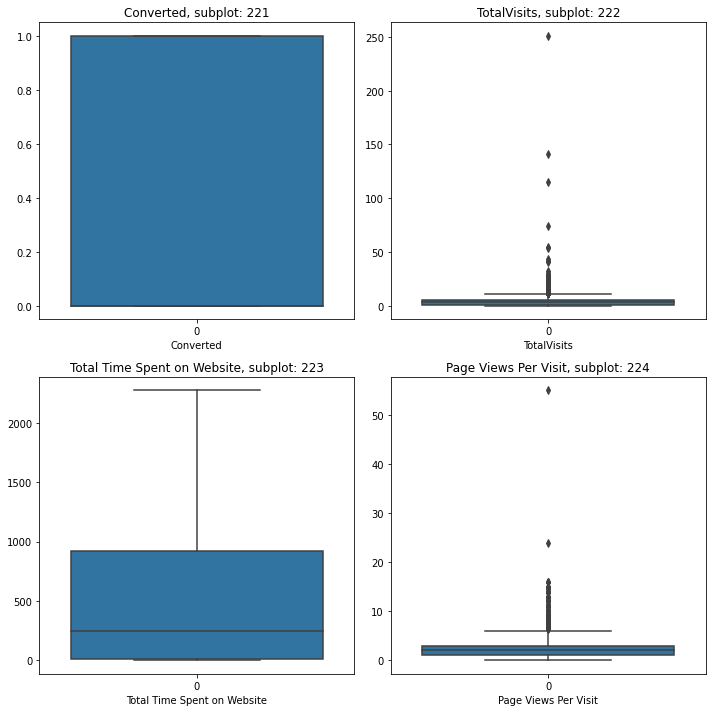

In [615]:
### Univariate analysis on continuous variables
a = 2  
b = 2  
c = 1  

fig = plt.figure(figsize= (10,10))

for i in data.columns:
    if data[i].dtypes=="int64" or data[i].dtypes=="float64" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(data[i])
        c = c + 1

fig.tight_layout()
plt.show()

In [616]:
#### Capping the below variables to 95% due to Outlier
outlier_data= data[['TotalVisits','Page Views Per Visit']]
outlier_data

,TotalVisits,Page Views Per Visit
0,0.0,0.00
1,5.0,2.50
2,2.0,2.00
3,1.0,1.00
4,2.0,1.00
...,...,...
9235,8.0,2.67
9236,2.0,2.00
9237,2.0,2.00
9238,3.0,3.00


In [617]:
for col in outlier_data.columns:
    percentiles = data[col].quantile([0.01, 0.95]).values
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

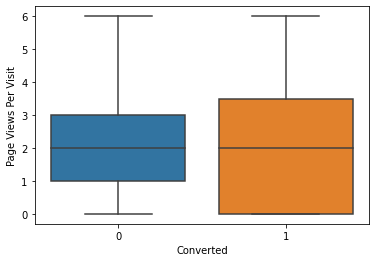

In [723]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

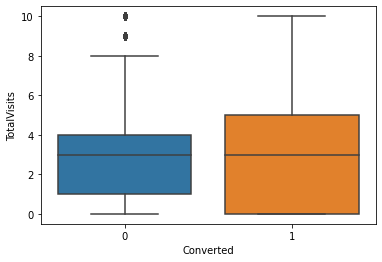

In [716]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

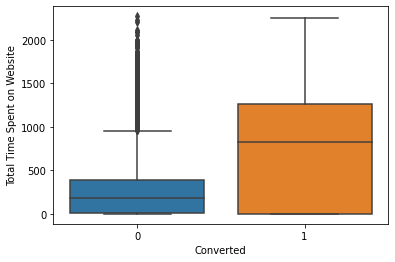

In [721]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

##### Bi-variate Analysis

Landing Page Submission    0.54
API                        0.39
Lead Add Form              0.07
Lead Import                0.00
Name: Lead Origin, dtype: float64


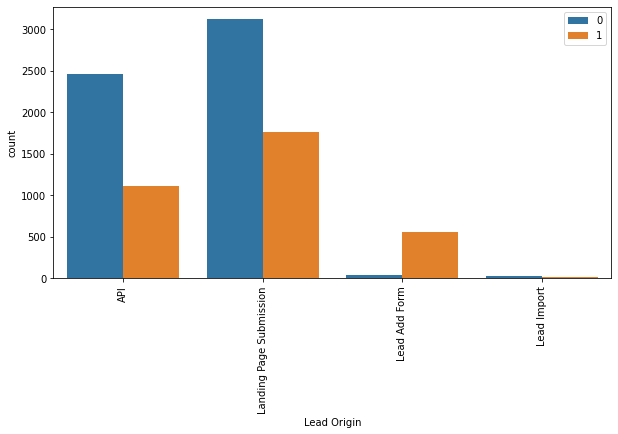

Google               0.32
Direct Traffic       0.28
Olark Chat           0.19
Organic Search       0.13
Reference            0.05
Welingak Website     0.01
Referral Sites       0.01
Facebook             0.00
bing                 0.00
google               0.00
Click2call           0.00
Press_Release        0.00
Social Media         0.00
Live Chat            0.00
youtubechannel       0.00
testone              0.00
Pay per Click Ads    0.00
welearnblog_Home     0.00
WeLearn              0.00
blog                 0.00
NC_EDM               0.00
Name: Lead Source, dtype: float64


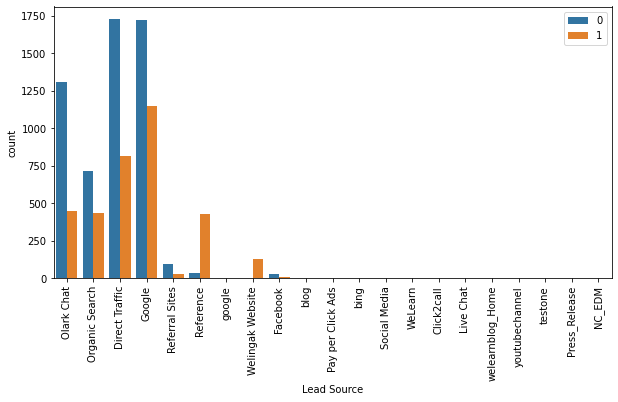

No     0.92
Yes    0.08
Name: Do Not Email, dtype: float64


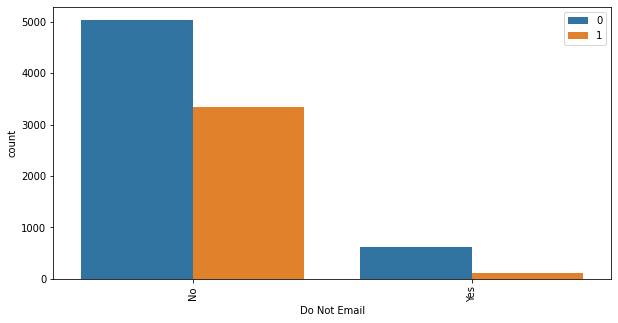

No     1.0
Yes    0.0
Name: Do Not Call, dtype: float64


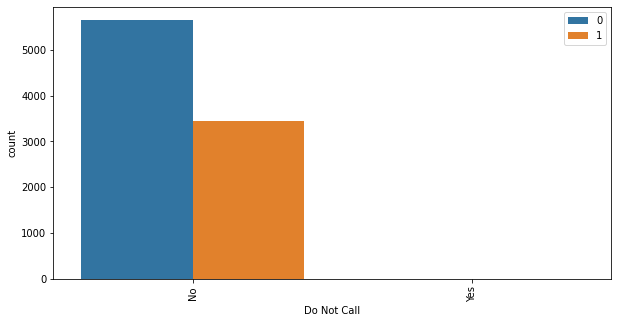

Email Opened                    0.38
SMS Sent                        0.30
Olark Chat Conversation         0.11
Page Visited on Website         0.07
Converted to Lead               0.05
Email Bounced                   0.04
Email Link Clicked              0.03
Form Submitted on Website       0.01
Unreachable                     0.01
Unsubscribed                    0.01
Had a Phone Conversation        0.00
Approached upfront              0.00
View in browser link Clicked    0.00
Email Received                  0.00
Email Marked Spam               0.00
Visited Booth in Tradeshow      0.00
Resubscribed to emails          0.00
Name: Last Activity, dtype: float64


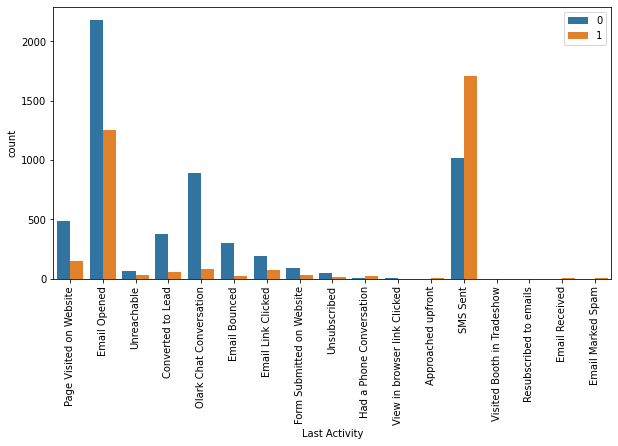

Unemployed              0.90
Working Professional    0.08
Student                 0.02
Other                   0.00
Housewife               0.00
Businessman             0.00
Name: What is your current occupation, dtype: float64


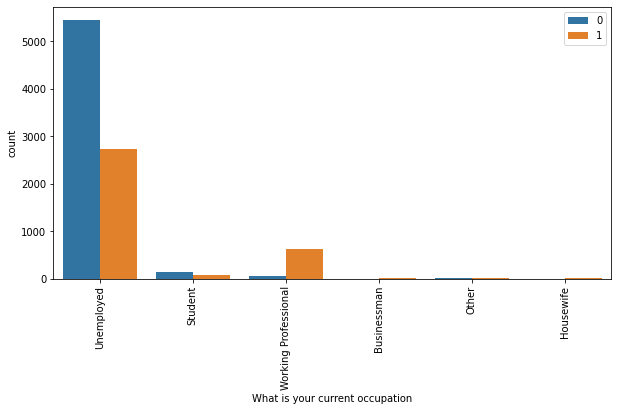

Better Career Prospects      1.0
Flexibility & Convenience    0.0
Other                        0.0
Name: What matters most to you in choosing a course, dtype: float64


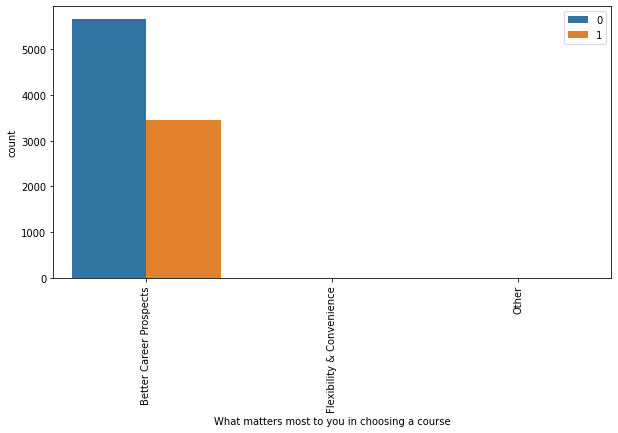

No     1.0
Yes    0.0
Name: Search, dtype: float64


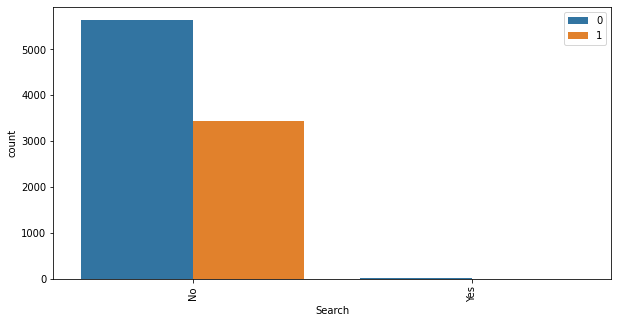

No    1.0
Name: Magazine, dtype: float64


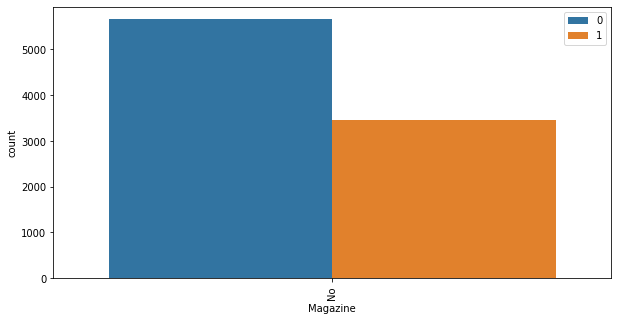

No     1.0
Yes    0.0
Name: Newspaper Article, dtype: float64


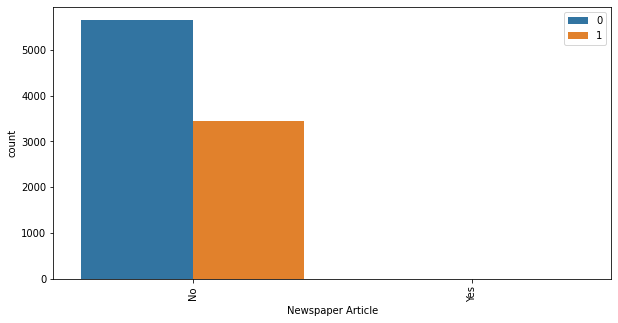

No     1.0
Yes    0.0
Name: X Education Forums, dtype: float64


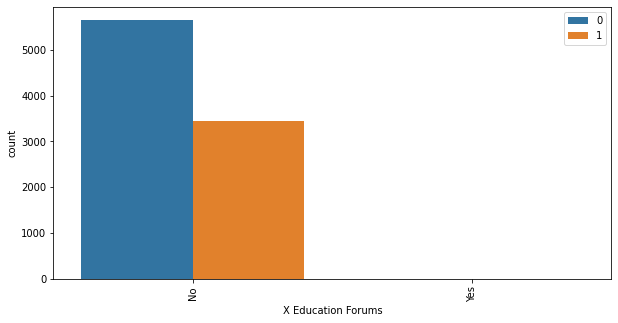

No     1.0
Yes    0.0
Name: Newspaper, dtype: float64


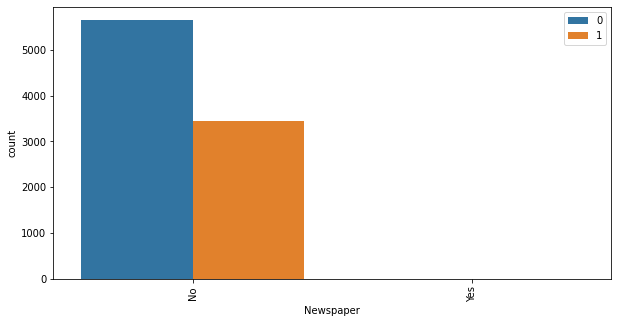

No     1.0
Yes    0.0
Name: Digital Advertisement, dtype: float64


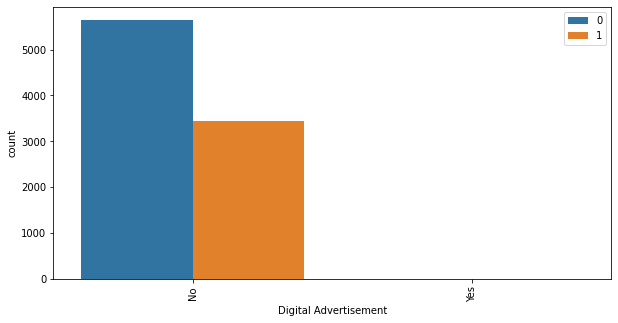

No     1.0
Yes    0.0
Name: Through Recommendations, dtype: float64


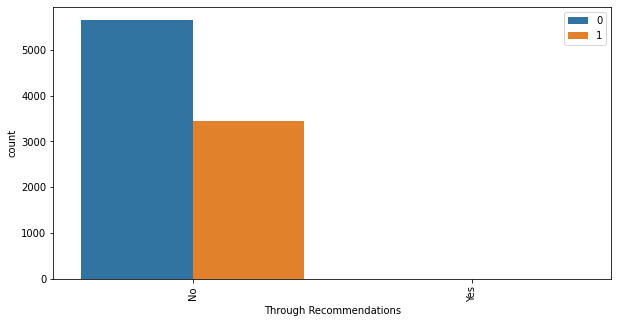

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64


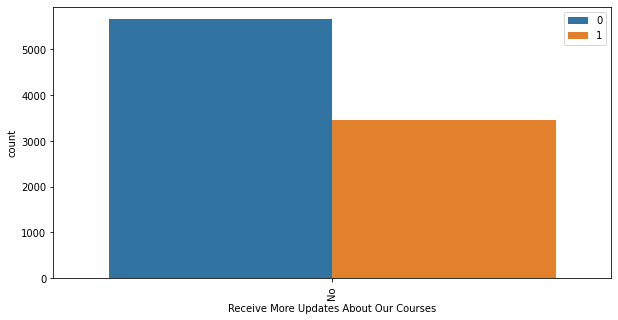

No    1.0
Name: Update me on Supply Chain Content, dtype: float64


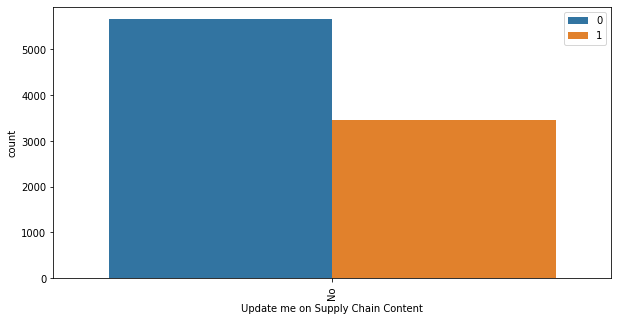

No    1.0
Name: Get updates on DM Content, dtype: float64


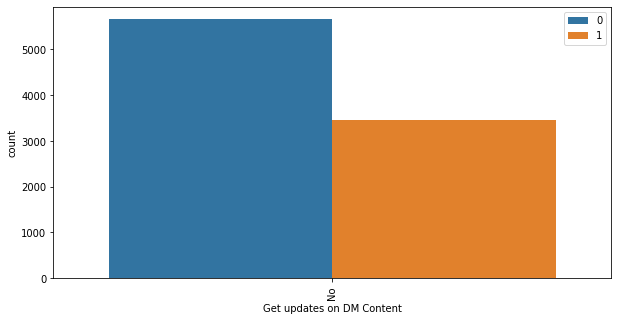

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64


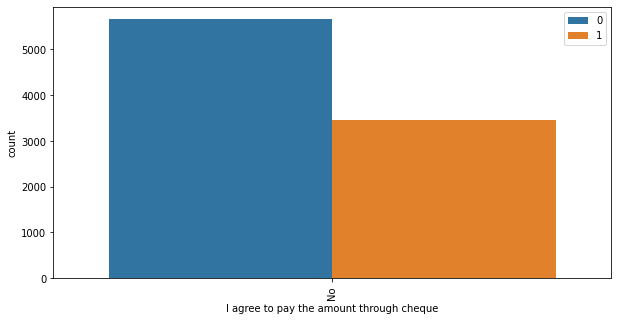

No     0.68
Yes    0.32
Name: A free copy of Mastering The Interview, dtype: float64


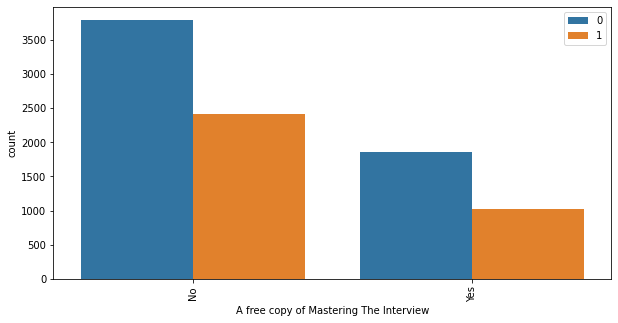

Modified                        0.36
Email Opened                    0.31
SMS Sent                        0.24
Page Visited on Website         0.03
Olark Chat Conversation         0.02
Email Link Clicked              0.02
Email Bounced                   0.01
Unsubscribed                    0.00
Unreachable                     0.00
Had a Phone Conversation        0.00
Email Marked Spam               0.00
Approached upfront              0.00
Resubscribed to emails          0.00
View in browser link Clicked    0.00
Form Submitted on Website       0.00
Email Received                  0.00
Name: Last Notable Activity, dtype: float64


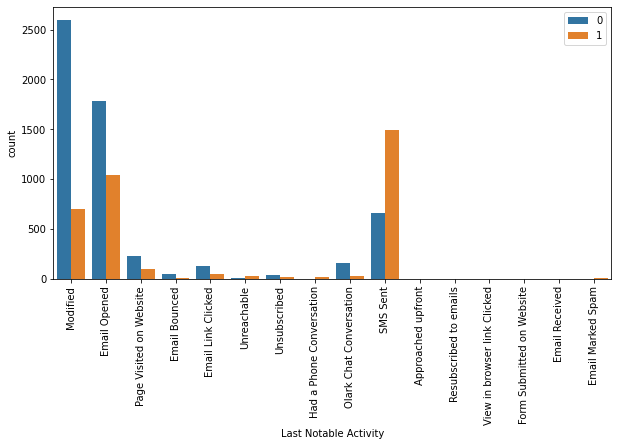

In [620]:
#### Bivariate anaysis on categorical variables
for cols in data.columns:
    if data[cols].dtypes=='object':
        print(round(data[cols].value_counts(normalize=True, dropna= False),2))
        plt.figure(figsize=[10,5])
        sns.countplot(x=cols,hue='Converted',data=data)
        plt.xticks(rotation = 90)
        plt.legend()
        plt.show()

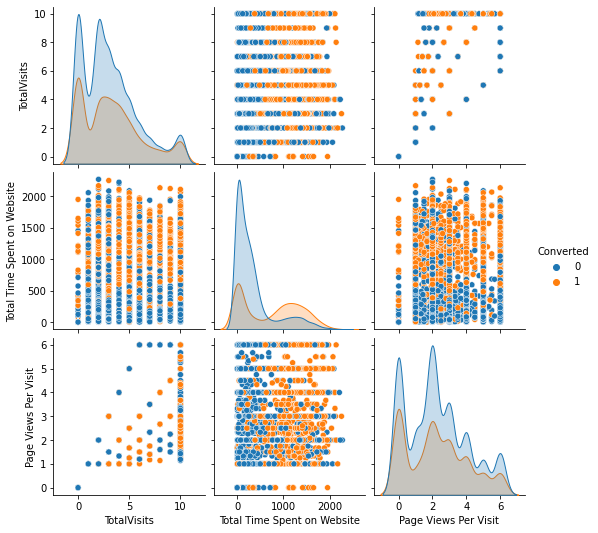

In [621]:
pair= data[['Converted','TotalVisits' ,'Total Time Spent on Website','Page Views Per Visit']]
sns.pairplot(pair, diag_kind='kde',hue='Converted')

##### Insights- 
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.

Below variables needs to be dropped:

Do Not Call, What matters most to you in choosing a course, Search, Magazine, Newspaper Article,  X Education Forums
Newspaper,  Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content,
Get updates on DM Content, I agree to pay the amount through cheque



###### Drop unwanted columns that data are skewed towards only one category (example- No, Better Career Prospects) & other unwanted columns

In [622]:
#### Drop unwanted columns that data are skewed towards only one category (example- No, Better Career Prospects) & other unwanted columns

data.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
           'Through Recommendations','Newspaper',
          'Receive More Updates About Our Courses','Digital Advertisement','X Education Forums','Newspaper Article',
          'Magazine','Search','What matters most to you in choosing a course','Do Not Call'], axis=1, inplace= True)

In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

### Step 3: Data Preparation

In [624]:
### Converting some binary variables (Yes/No) to 1/0
vars= ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1, 'No': 0})

data[vars]= data[vars].apply(binary_map)

In [625]:
### Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)
dummy1.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [626]:
dummy1.shape

(9103, 60)

In [627]:
# Adding the results to the master dataframe
data1 = pd.concat([data, dummy1], axis=1)
data1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0


In [628]:
# We have created dummies for the below variables, so we can drop them (dropping repeated variables)
data1 = data1.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'A free copy of Mastering The Interview','Last Notable Activity'], axis = 1)

In [629]:
data1.shape

(9103, 64)

### Step 4: Test-Train Split

In [630]:
from sklearn.model_selection import train_test_split

In [631]:
# Putting feature variable to X
X= data1.drop('Converted', axis=1)

In [632]:
# Putting response variable to y
y= data1.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [633]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [634]:
from sklearn.preprocessing import StandardScaler

In [635]:
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7963,0,2.442118,2.486792,0.136708,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5521,1,1.369599,-0.836090,2.073898,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1951,0,-0.060426,1.828055,0.413450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1553,0,0.297080,1.307999,-0.140033,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9170,0,-1.132945,-0.890832,-1.246999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [636]:
### Checking the converted rate
Converted = round((sum(data['Converted'])/len(data['Converted'].index))*100,2)
Converted

37.92

We have almost 38% converted rate

### Step 7: Feature Selection Using RFE

In [637]:
from sklearn.linear_model import LogisticRegression

In [638]:
logreg = LogisticRegression()

In [639]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)            
rfe = rfe.fit(X_train, y_train)

In [640]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False])

In [641]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 15),
 ('Lead Source_google', False, 8),
 ('Lead Source_testone', False, 35),
 ('Lead Source_welea

In [642]:
col = X_train.columns[rfe.support_]

In [643]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last 

### Step 8: Model Building

In [644]:
import statsmodels.api as sm

#### Model-1

In [645]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.1
Date:                Tue, 19 Sep 2023   Deviance:                       5356.3
Time:                        06:20:48   Pearson chi2:                 6.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1467      0.070      2.108      0.035       0.010       0.283
Do Not Email                                            -1.2650      0.191     -6.636      0.000      -1.639      -0.891
Total Time Spent on Website                              1.1224      0.040     28.165      0.000       1.044       1.200
Lead Origin_Lead Add Form                                2.0214      0.958      2.110      0.035       0.144       3.899
Lead Source_Olark Chat                                   1.2263      0.103     11.942      0.000       1.025       1.428
Lead Source_Reference                                    2.0629      0.982      2.101      0.036       0.139       3.987
Lead Source_Welingak Website                             4.5719      1.393      3.282      0.001       1.842       7.302
Last Activity_Email Bounced                             -1.0587      0.348     -3.043      0.002      -1.741      -0.377
Last Activity_Olark Chat Conversation                   -1.1543      0.187     -6.157      0.000      -1.522      -0.787
Last Activity_Unreachable                               -1.6462      0.774     -2.126      0.033      -3.164      -0.129
What is your current occupation_Housewife               23.5347   3.27e+04      0.001      0.999   -6.41e+04    6.41e+04
What is your current occupation_Working Professional     2.6676      0.185     14.444      0.000       2.306       3.030
Last Notable Activity_Email Link Clicked                -2.0744      0.261     -7.936      0.000      -2.587      -1.562
Last Notable Activity_Email Opened                      -1.3384      0.088    -15.280      0.000      -1.510      -1.167
Last Notable Activity_Had a Phone Conversation          23.0149   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Last Notable Activity_Modified                          -1.8561      0.098    -18.993      0.000      -2.048      -1.665
Last Notable Activity_Olark Chat Conversation           -1.6136      0.362     -4.462      0.000      -2.322      -0.905
Last Notable Activity_Page Visited on Website           -1.6037      0.201     -7.970      0.000      -1.998      -1.209
Last Notable Activity_Unreachable                        1.5056      0.936      1.608      0.108      -0.330       3.341
========================================================================================================================
"""

In [646]:
### dropping variable with highest P-value
col= col.drop('What is your current occupation_Housewife')

##### Model-2

In [647]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.4
Date:                Tue, 19 Sep 2023   Deviance:                       5362.7
Time:                        06:20:49   Pearson chi2:                 6.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1470      0.070      2.113      0.035       0.011       0.283
Do Not Email                                            -1.2665      0.191     -6.643      0.000      -1.640      -0.893
Total Time Spent on Website                              1.1231      0.040     28.190      0.000       1.045       1.201
Lead Origin_Lead Add Form                                2.0198      0.958      2.109      0.035       0.143       3.897
Lead Source_Olark Chat                                   1.2245      0.103     11.929      0.000       1.023       1.426
Lead Source_Reference                                    2.0813      0.982      2.120      0.034       0.157       4.005
Lead Source_Welingak Website                             4.5712      1.393      3.282      0.001       1.841       7.301
Last Activity_Email Bounced                             -1.0607      0.348     -3.047      0.002      -1.743      -0.379
Last Activity_Olark Chat Conversation                   -1.1571      0.187     -6.172      0.000      -1.524      -0.790
Last Activity_Unreachable                               -1.6531      0.775     -2.134      0.033      -3.172      -0.135
What is your current occupation_Working Professional     2.6645      0.185     14.427      0.000       2.303       3.026
Last Notable Activity_Email Link Clicked                -2.0602      0.260     -7.939      0.000      -2.569      -1.552
Last Notable Activity_Email Opened                      -1.3358      0.088    -15.254      0.000      -1.507      -1.164
Last Notable Activity_Had a Phone Conversation          22.0147   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Last Notable Activity_Modified                          -1.8522      0.098    -18.964      0.000      -2.044      -1.661
Last Notable Activity_Olark Chat Conversation           -1.6100      0.362     -4.452      0.000      -2.319      -0.901
Last Notable Activity_Page Visited on Website           -1.6041      0.201     -7.971      0.000      -1.999      -1.210
Last Notable Activity_Unreachable                        1.5125      0.937      1.614      0.106      -0.324       3.349
========================================================================================================================
"""

In [648]:
### dropping variable with highest P-value
col= col.drop('Last Notable Activity_Had a Phone Conversation')

#### Model- 3

In [649]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.4
Date:                Tue, 19 Sep 2023   Deviance:                       5372.8
Time:                        06:20:49   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1636      0.069      2.359      0.018       0.028       0.299
Do Not Email                                            -1.2770      0.191     -6.699      0.000      -1.651      -0.903
Total Time Spent on Website                              1.1203      0.040     28.168      0.000       1.042       1.198
Lead Origin_Lead Add Form                                2.0150      0.958      2.104      0.035       0.138       3.892
Lead Source_Olark Chat                                   1.2166      0.103     11.861      0.000       1.016       1.418
Lead Source_Reference                                    2.0799      0.982      2.119      0.034       0.156       4.004
Lead Source_Welingak Website                             4.5703      1.393      3.281      0.001       1.840       7.300
Last Activity_Email Bounced                             -1.0574      0.348     -3.038      0.002      -1.740      -0.375
Last Activity_Olark Chat Conversation                   -1.1552      0.187     -6.163      0.000      -1.523      -0.788
Last Activity_Unreachable                               -1.6532      0.775     -2.134      0.033      -3.171      -0.135
What is your current occupation_Working Professional     2.6615      0.185     14.415      0.000       2.300       3.023
Last Notable Activity_Email Link Clicked                -2.0735      0.259     -7.993      0.000      -2.582      -1.565
Last Notable Activity_Email Opened                      -1.3501      0.087    -15.439      0.000      -1.521      -1.179
Last Notable Activity_Modified                          -1.8659      0.098    -19.125      0.000      -2.057      -1.675
Last Notable Activity_Olark Chat Conversation           -1.6231      0.362     -4.490      0.000      -2.332      -0.914
Last Notable Activity_Page Visited on Website           -1.6179      0.201     -8.044      0.000      -2.012      -1.224
Last Notable Activity_Unreachable                        1.4968      0.937      1.598      0.110      -0.339       3.333
========================================================================================================================
"""

In [650]:
### dropping variable with highest P-value
col= col.drop('Last Notable Activity_Unreachable')

#### Model- 4

In [651]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.9
Date:                Tue, 19 Sep 2023   Deviance:                       5375.8
Time:                        06:20:49   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1727      0.069      2.497      0.013       0.037       0.308
Do Not Email                                            -1.2831      0.191     -6.732      0.000      -1.657      -0.910
Total Time Spent on Website                              1.1197      0.040     28.162      0.000       1.042       1.198
Lead Origin_Lead Add Form                                2.0151      0.958      2.103      0.036       0.137       3.893
Lead Source_Olark Chat                                   1.2165      0.103     11.859      0.000       1.015       1.418
Lead Source_Reference                                    2.0731      0.982      2.111      0.035       0.148       3.998
Lead Source_Welingak Website                             4.5739      1.393      3.283      0.001       1.843       7.305
Last Activity_Email Bounced                             -1.0506      0.348     -3.018      0.003      -1.733      -0.368
Last Activity_Olark Chat Conversation                   -1.1455      0.187     -6.113      0.000      -1.513      -0.778
Last Activity_Unreachable                               -0.7463      0.395     -1.888      0.059      -1.521       0.028
What is your current occupation_Working Professional     2.6659      0.185     14.437      0.000       2.304       3.028
Last Notable Activity_Email Link Clicked                -2.0823      0.259     -8.029      0.000      -2.591      -1.574
Last Notable Activity_Email Opened                      -1.3590      0.087    -15.565      0.000      -1.530      -1.188
Last Notable Activity_Modified                          -1.8850      0.097    -19.432      0.000      -2.075      -1.695
Last Notable Activity_Olark Chat Conversation           -1.6418      0.361     -4.543      0.000      -2.350      -0.934
Last Notable Activity_Page Visited on Website           -1.6263      0.201     -8.088      0.000      -2.020      -1.232
========================================================================================================================
"""

In [652]:
### dropping variable with highest P-value
col= col.drop('Last Activity_Unreachable')

#### Model-5

In [653]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.8
Date:                Tue, 19 Sep 2023   Deviance:                       5379.7
Time:                        06:20:49   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1603      0.069      2.329      0.020       0.025       0.295
Do Not Email                                            -1.2797      0.190     -6.725      0.000      -1.653      -0.907
Total Time Spent on Website                              1.1215      0.040     28.211      0.000       1.044       1.199
Lead Origin_Lead Add Form                                2.0213      0.959      2.107      0.035       0.141       3.901
Lead Source_Olark Chat                                   1.2211      0.103     11.905      0.000       1.020       1.422
Lead Source_Reference                                    2.0677      0.983      2.104      0.035       0.141       3.994
Lead Source_Welingak Website                             4.5793      1.394      3.285      0.001       1.847       7.311
Last Activity_Email Bounced                             -1.0415      0.348     -2.993      0.003      -1.724      -0.359
Last Activity_Olark Chat Conversation                   -1.1322      0.187     -6.044      0.000      -1.499      -0.765
What is your current occupation_Working Professional     2.6695      0.185     14.450      0.000       2.307       3.032
Last Notable Activity_Email Link Clicked                -2.0717      0.259     -7.990      0.000      -2.580      -1.564
Last Notable Activity_Email Opened                      -1.3480      0.087    -15.481      0.000      -1.519      -1.177
Last Notable Activity_Modified                          -1.8885      0.097    -19.491      0.000      -2.078      -1.699
Last Notable Activity_Olark Chat Conversation           -1.6458      0.361     -4.554      0.000      -2.354      -0.937
Last Notable Activity_Page Visited on Website           -1.6155      0.201     -8.036      0.000      -2.009      -1.221
========================================================================================================================
"""

#### All the P-values looks significant, lets look for multicollinearity using Variance Inflation Factor (VIF)

In [654]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,73.47
4,Lead Source_Reference,57.35
5,Lead Source_Welingak Website,17.19
7,Last Activity_Olark Chat Conversation,1.96
0,Do Not Email,1.74
6,Last Activity_Email Bounced,1.73
3,Lead Source_Olark Chat,1.70
11,Last Notable Activity_Modified,1.54
12,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24


In [655]:
### dropping variable with highest VIF
col= col.drop('Lead Origin_Lead Add Form')

#### Model-6

In [656]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.2
Date:                Tue, 19 Sep 2023   Deviance:                       5384.5
Time:                        06:20:50   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1629      0.069      2.368      0.018       0.028       0.298
Do Not Email                                            -1.2823      0.190     -6.743      0.000      -1.655      -0.910
Total Time Spent on Website                              1.1198      0.040     28.187      0.000       1.042       1.198
Lead Source_Olark Chat                                   1.2194      0.103     11.896      0.000       1.019       1.420
Lead Source_Reference                                    4.0846      0.226     18.082      0.000       3.642       4.527
Lead Source_Welingak Website                             6.5964      1.014      6.505      0.000       4.609       8.584
Last Activity_Email Bounced                             -1.0400      0.348     -2.989      0.003      -1.722      -0.358
Last Activity_Olark Chat Conversation                   -1.1341      0.187     -6.055      0.000      -1.501      -0.767
What is your current occupation_Working Professional     2.6665      0.185     14.436      0.000       2.304       3.029
Last Notable Activity_Email Link Clicked                -2.0732      0.259     -7.998      0.000      -2.581      -1.565
Last Notable Activity_Email Opened                      -1.3461      0.087    -15.466      0.000      -1.517      -1.176
Last Notable Activity_Modified                          -1.8885      0.097    -19.495      0.000      -2.078      -1.699
Last Notable Activity_Olark Chat Conversation           -1.6453      0.361     -4.554      0.000      -2.353      -0.937
Last Notable Activity_Page Visited on Website           -1.6008      0.200     -7.997      0.000      -1.993      -1.209
========================================================================================================================
"""

In [657]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.96
0,Do Not Email,1.74
5,Last Activity_Email Bounced,1.73
2,Lead Source_Olark Chat,1.70
10,Last Notable Activity_Modified,1.54
11,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24
3,Lead Source_Reference,1.17
7,What is your current occupation_Working Profes...,1.14
9,Last Notable Activity_Email Opened,1.11


### Making Prediction on the Train set`

In [658]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7963    0.976466
5521    0.025171
1951    0.703457
1553    0.569904
9170    0.276609
5097    0.276609
8953    0.439883
308     0.704734
5520    0.113229
1045    0.178747
dtype: float64

In [659]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97646607, 0.0251712 , 0.70345682, 0.56990399, 0.27660887,
       0.27660887, 0.43988281, 0.70473399, 0.11322903, 0.17874693])

In [660]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.976466,7963
1,0,0.025171,5521
2,1,0.703457,1951
3,1,0.569904,1553
4,0,0.276609,9170


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [661]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.976466,7963,1
1,0,0.025171,5521,0
2,1,0.703457,1951,1
3,1,0.569904,1553,1
4,0,0.276609,9170,0


#### Making the confusion matrix

In [662]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3476  445]
 [ 755 1696]]


In [663]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3476      445
# converted            755       1696

In [664]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.8116760828625236


#### Metrics beyond simply accuracy

In [665]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [666]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6919624643002856


In [667]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8865085437388421


In [668]:
# Calculate false postive rate - predicting the converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11349145626115786


In [669]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7921531994395142


In [670]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8215551878988419


###### We found out that our specificity was good (~89%) but our sensitivity was only 69% as we chose cutoff as 0.5. Hence now, this cut-off point had to be optimised in order to get a good value of sensitivity using ROC curve


### Step 9: Plotting the ROC Curve

In [671]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [672]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

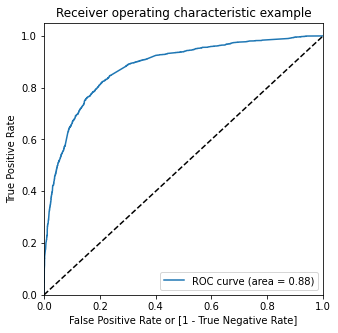

In [673]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### ROC area under curve is 0.88

### Step 10: Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [674]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.976466,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.025171,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.703457,1951,1,1,1,1,1,1,1,1,1,0,0
3,1,0.569904,1553,1,1,1,1,1,1,1,0,0,0,0
4,0,0.276609,9170,0,1,1,1,0,0,0,0,0,0,0


In [675]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.584432  0.968584  0.344300
0.2   0.2  0.751726  0.903713  0.656720
0.3   0.3  0.795669  0.840065  0.767916
0.4   0.4  0.810107  0.767442  0.836776
0.5   0.5  0.811676  0.691962  0.886509
0.6   0.6  0.790804  0.577315  0.924254
0.7   0.7  0.777621  0.500204  0.951033
0.8   0.8  0.750942  0.399021  0.970926
0.9   0.9  0.706999  0.257038  0.988268


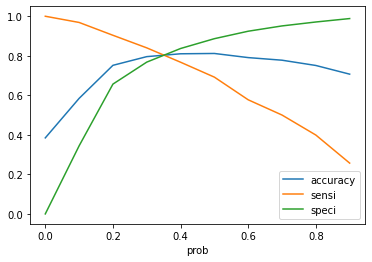

In [676]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [677]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.976466,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.025171,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.703457,1951,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.569904,1553,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.276609,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [678]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.976466,7963,1,1,1,1,1,1,1,1,1,1,1,1,98
1,0,0.025171,5521,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,0.703457,1951,1,1,1,1,1,1,1,1,1,0,0,1,70
3,1,0.569904,1553,1,1,1,1,1,1,1,0,0,0,0,1,57
4,0,0.276609,9170,0,1,1,1,0,0,0,0,0,0,0,0,28


In [679]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8046139359698682


In [680]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3153,  768],
       [ 477, 1974]], dtype=int64)

In [681]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3153     768
# converted            477      1794

In [682]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [683]:
# Let's see the sensitivity & Specificity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity :  0.8053855569155447
Specificity : 0.8041315990818668


In [684]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

False Positive rate :  0.19586840091813312
Positive Predictive Value : 0.7199124726477024
Negative Predictive Value :  0.868595041322314


#### Precision and Recall
Precision also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [685]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3476,  445],
       [ 755, 1696]], dtype=int64)

In [686]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.7921531994395142
Recall : 0.6919624643002856


In [687]:
### Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [688]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Precision : 0.7921531994395142
Recall : 0.6919624643002856


In [689]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    0
 6371    0
 Name: Converted, Length: 6372, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    0
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [690]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

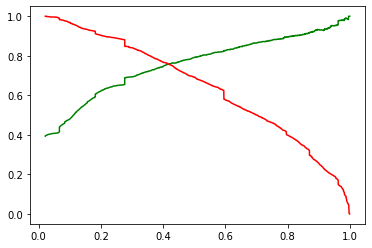

In [691]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [692]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [693]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3497,0,-0.890832,0,1,0,0,0,0,0,1,0,0,0
4044,0,-0.890832,1,0,0,0,0,0,0,0,0,0,0
7200,0,-0.617119,0,0,0,0,0,0,0,0,1,0,0
1183,0,-0.890832,1,0,0,1,0,0,0,0,1,0,0
8216,0,-0.826966,0,0,0,0,0,0,0,0,0,0,1


In [694]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3497    0.870320
4044    0.595015
7200    0.081907
1183    0.072845
8216    0.085959
8746    0.276609
9047    0.107126
6526    0.505079
7694    0.155976
8184    0.882656
dtype: float64

In [695]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [696]:
# Let's see the head
y_pred_1.head()

,0
3497,0.870320
4044,0.595015
7200,0.081907
1183,0.072845
8216,0.085959


In [697]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [698]:
# Creating a Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [699]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [700]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [701]:
y_pred_final.head()

,Converted,Lead ID,0
0,1,3497,0.870320
1,1,4044,0.595015
2,0,7200,0.081907
3,0,1183,0.072845
4,0,8216,0.085959


In [702]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [703]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead ID','Converted','Converted_prob'])

In [704]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,3497,1,0.870320
1,4044,1,0.595015
2,7200,0,0.081907
3,1183,0,0.072845
4,8216,0,0.085959


In [705]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [706]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3497,1,0.870320,1
1,4044,1,0.595015,1
2,7200,0,0.081907,0
3,1183,0,0.072845,0
4,8216,0,0.085959,0


In [707]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8066642255584036


In [708]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1409,  321],
       [ 207,  794]], dtype=int64)

In [709]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [710]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.7932067932067932
Specificity : 0.8144508670520231


### Step 12: Assigning Lead Score to the Testing data

In [711]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3497,1,0.870320,1,87
1,4044,1,0.595015,1,60
2,7200,0,0.081907,0,8
3,1183,0,0.072845,0,7
4,8216,0,0.085959,0,9


#### Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Leads'.

In [712]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3497,1,0.870320,1,87
9,8184,1,0.882656,1,88
15,4723,1,0.975599,1,98
18,6774,1,0.797063,1,80
19,6601,1,0.874371,1,87
...,...,...,...,...,...
2694,4613,1,0.998712,1,100
2708,6667,0,0.923139,1,92
2716,3770,1,0.970767,1,97
2719,4778,0,0.989751,1,99


##### We got 463 leads which can be contacted and have a high chance of getting converted

In [713]:
print(" Hot Lead's Lead ID :")

hot_leads_ID = hot_leads["Lead ID"].values.reshape(-1)
hot_leads_ID

 Hot Lead's Lead ID :


array([3497, 8184, 4723, 6774, 6601, 2043, 4028, 7187, 1046, 4795, 8581,
       7212,  784, 3917, 4844, 2584, 9233, 8070, 1032, 3288, 1200,  507,
       4560, 2765, 4403, 2594, 2655, 2184, 2458, 5377, 7445, 5937, 6729,
       1467, 8261, 8348, 3664, 8757, 8413, 7320, 2653, 2886, 2031, 4250,
       1840, 8229, 8286, 3496, 7193, 5503,  789,  999, 3679, 7902, 4732,
       5817, 3113, 8282, 2962, 7092, 2562, 1278, 6755,   76, 2837, 7240,
       5757, 3840, 4418, 2296, 6422, 8293, 6323,  242, 3929, 5090, 5275,
       9171, 7736, 1214,  880, 8986, 2575, 4353, 1287, 4992, 8265, 8901,
       5793, 1564, 6458, 6627, 2354, 4223,  720, 5137, 6252, 8183, 8576,
        449, 7033, 4297,  939, 7469, 8105, 1946, 6026, 7018, 8393, 5801,
       6179, 8592, 7259, 3270, 4281, 8594, 2664, 1360, 6411, 3212,  220,
       7840, 7427, 2011, 8786, 1462, 7925,  112, 3042, 7701, 2543, 7699,
       1310, 4359, 2651, 5061, 8433, 7690, 6501, 7265, 6931, 5167, 2614,
       1283, 5647, 4009, 3285, 1923, 6982, 1407, 59

####  Finding out the Important Features from our final model

In [714]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.596353
Lead Source_Reference                                   4.084567
What is your current occupation_Working Professional    2.666482
Lead Source_Olark Chat                                  1.219430
Total Time Spent on Website                             1.119792
const                                                   0.162855
Last Activity_Email Bounced                            -1.039992
Last Activity_Olark Chat Conversation                  -1.134083
Do Not Email                                           -1.282335
Last Notable Activity_Email Opened                     -1.346083
Last Notable Activity_Page Visited on Website          -1.600835
Last Notable Activity_Olark Chat Conversation          -1.645285
Last Notable Activity_Modified                         -1.888530
Last Notable Activity_Email Link Clicked               -2.073213
dtype: float64